# **Machine Learning models for Classification (Tensorflow + Keras)**
*Artificial Neural Networks to analyze 3-Year prognostication for patients with brain arteriovenous malformation (AVM) after stereotactic radiosurgery: a study for a small and heterogeneous group in Peru.*
> *Developed by*: **Mirko J. Rodríguez** (https://www.linkedin.com/in/mirkorodriguez/)

---


## **Setup Environment**
---

Tensorflow 2 (include Keras)

In [207]:
import tensorflow as tf
print('Tensorflow: ',tf.__version__)

from tensorflow import keras
print('TF Keras: ',keras.__version__)

import platform
print('Python:',platform.python_version())

import sklearn 
print('sklearn: {}'. format(sklearn. __version__))

Tensorflow:  2.8.2
TF Keras:  2.8.0
Python: 3.7.13
sklearn: 1.0.2


In [150]:
%%bash 
# Install external librearies
python -m pip uninstall matplotlib
pip install matplotlib==3.1.3
pip install autoviz # EDA
pip install keras-visualizer # Visualizer for ANN

Found existing installation: matplotlib 3.5.2
Uninstalling matplotlib-3.5.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? Your response ('pip install matplotlib==3.1.3') was not one of the expected responses: y, n
Proceed (y/n)? Your response ('pip install autoviz # eda') was not one of the expected responses: y, n
Proceed (y/n)? Your response ('pip install keras-visualizer # visualizer for ann') was not one of the exp

ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/uninstall.py", line 86, in run
    auto_confirm=options.yes, verbose=self.verbosity > 0,
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/req/req_install.py", line 658, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/req/req_uninstall.py", line 380, in remove
    if auto_confirm or self._allowed_to_proceed(verbose):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/req/req_uninstall.py", line 423, in _allowed_to_proceed
    return ask('Proceed (y/n)? ', ('y', 'n')) == 'y'
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/utils/misc.py", line 203, in ask
    response = input(message)
EOFError: EOF when reading a line



## **Dataset Loading**
---

**Mount Google Drive:**

In [151]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Read dataset:**

In [152]:
%%bash
# Read folders in google drive
MYPROJECT="/content/drive/MyDrive/UNI/DSc/Ciclo 5/Taller de Machine Learning/Session Final - 06 Agosto/Final/3. Code"
ls -l "$MYPROJECT"
echo "$MYPROJECT" > config.txt

total 863
drwx------ 2 root root   4096 Aug  6 17:52 dataset
-rw------- 1 root root 875455 Aug  6 19:30 MAV Classification v3.ipynb
drwx------ 2 root root   4096 Aug  6 18:46 model


In [153]:
# Import Dataset
import pandas as pd
project_folder = open('config.txt').readline().rstrip('\n')
csv_file = project_folder + "/dataset/dataset-mav-msalas.v6.csv"
dataset = pd.read_csv(csv_file)

# Show info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            202 non-null    int64  
 1   gender                        202 non-null    int64  
 2   age                           202 non-null    int64  
 3   residence                     202 non-null    int64  
 4   ocupation                     202 non-null    int64  
 5   education_level               202 non-null    int64  
 6   health_insurance              202 non-null    int64  
 7   haemorrhage                   202 non-null    int64  
 8   haemorrhage_type              202 non-null    int64  
 9   headache                      202 non-null    int64  
 10  seizures                      202 non-null    int64  
 11  encephalomalacia              202 non-null    int64  
 12  other_diseases                202 non-null    int64  
 13  defic

## **Exploratory Data Analysis (EDA)**
---


In [154]:
""" First observations (10) """
dataset.head(10)

,id,gender,age,residence,ocupation,education_level,health_insurance,haemorrhage,haemorrhage_type,headache,...,das_examination,karnofsky_scale,glasgow_coma_scale,spetzler_martin_scale,buffalo_scale,virginia_scale,num_isocenters,radiation_dosis,isodosis,curation
0,1,1,11,1,6,2,3,1,1,1,...,1,80,15,3,3,4,1,18.0,80,1
1,2,2,8,1,6,2,3,1,3,1,...,1,90,15,3,3,2,1,18.0,80,1
2,3,2,32,1,3,3,5,1,1,1,...,1,90,15,3,2,1,1,18.0,80,1
3,4,2,52,2,3,3,1,1,4,1,...,1,90,15,3,2,2,2,12.5,50,1
4,5,1,38,1,1,4,1,2,4,1,...,1,90,15,3,2,1,1,18.0,80,1
5,6,2,20,2,1,4,2,1,4,2,...,1,80,15,3,4,3,1,18.0,80,0
6,7,1,38,2,1,4,4,2,4,1,...,2,90,15,2,2,1,1,18.0,80,0
7,8,1,45,1,4,4,5,1,4,1,...,1,80,15,3,2,3,2,15.0,50,1
8,9,1,9,1,6,2,3,1,1,1,...,1,90,15,3,2,2,2,16.0,50,1
9,10,2,10,2,6,2,2,1,4,1,...,1,90,15,2,2,1,1,17.0,80,1


In [155]:
""" Describe dataset """
dataset.describe()

,id,gender,age,residence,ocupation,education_level,health_insurance,haemorrhage,haemorrhage_type,headache,...,das_examination,karnofsky_scale,glasgow_coma_scale,spetzler_martin_scale,buffalo_scale,virginia_scale,num_isocenters,radiation_dosis,isodosis,curation
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,101.500000,1.470297,27.628713,1.202970,4.153465,3.069307,3.089109,1.232673,2.376238,1.118812,...,1.054455,82.777228,14.792079,2.544554,2.425743,2.079208,1.351485,17.854505,69.306931,0.826733
std,58.456537,0.500357,14.901526,0.427175,2.228538,0.736503,1.075267,0.423585,1.351995,0.324371,...,0.227478,9.374193,0.463962,0.886883,0.975792,0.824780,0.555589,4.440948,14.369497,0.379419
min,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,40.000000,12.000000,1.000000,0.000000,0.000000,1.000000,10.000000,50.000000,0.000000
25%,51.250000,1.000000,17.000000,1.000000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,80.000000,15.000000,2.000000,2.000000,2.000000,1.000000,16.000000,50.000000,1.000000
50%,101.500000,1.000000,25.000000,1.000000,4.000000,3.000000,3.000000,1.000000,2.000000,1.000000,...,1.000000,80.000000,15.000000,3.000000,2.000000,2.000000,1.000000,17.000000,80.000000,1.000000
75%,151.750000,2.000000,36.000000,1.000000,6.000000,4.000000,4.000000,1.000000,4.000000,1.000000,...,1.000000,90.000000,15.000000,3.000000,3.000000,3.000000,2.000000,18.000000,80.000000,1.000000
max,202.000000,2.000000,68.000000,3.000000,8.000000,4.000000,5.000000,2.000000,4.000000,2.000000,...,2.000000,100.000000,15.000000,5.000000,5.000000,4.000000,4.000000,40.000000,90.000000,1.000000


Shape of your Data Set loaded: (202, 46)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    46 Predictors classified...
        1 variables removed since they were ID or low-information variables
3 numeric variables in data exceeds limit, taking top 30 variables
Number of All Scatter Plots = 6


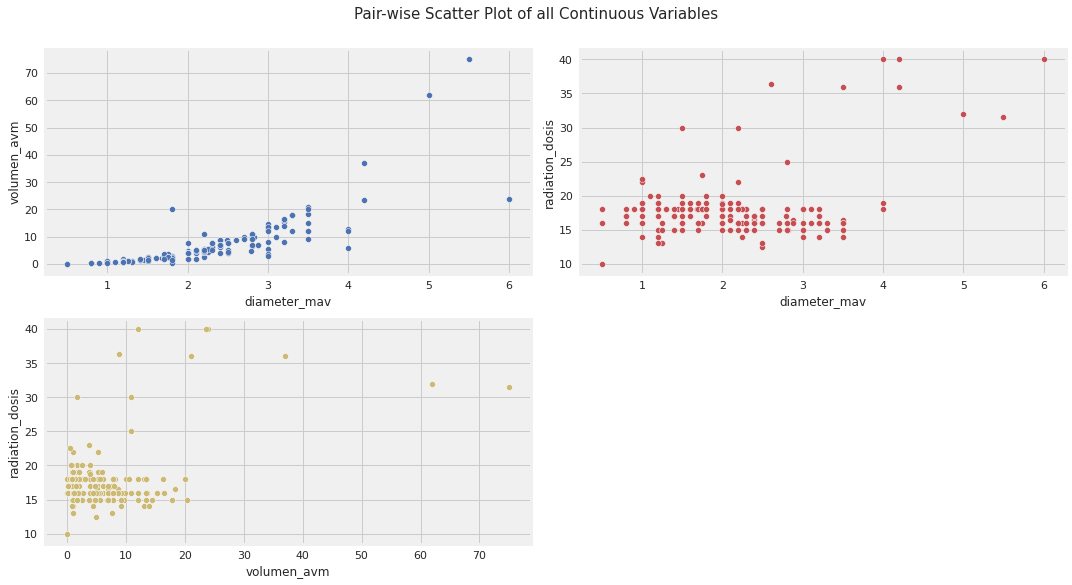

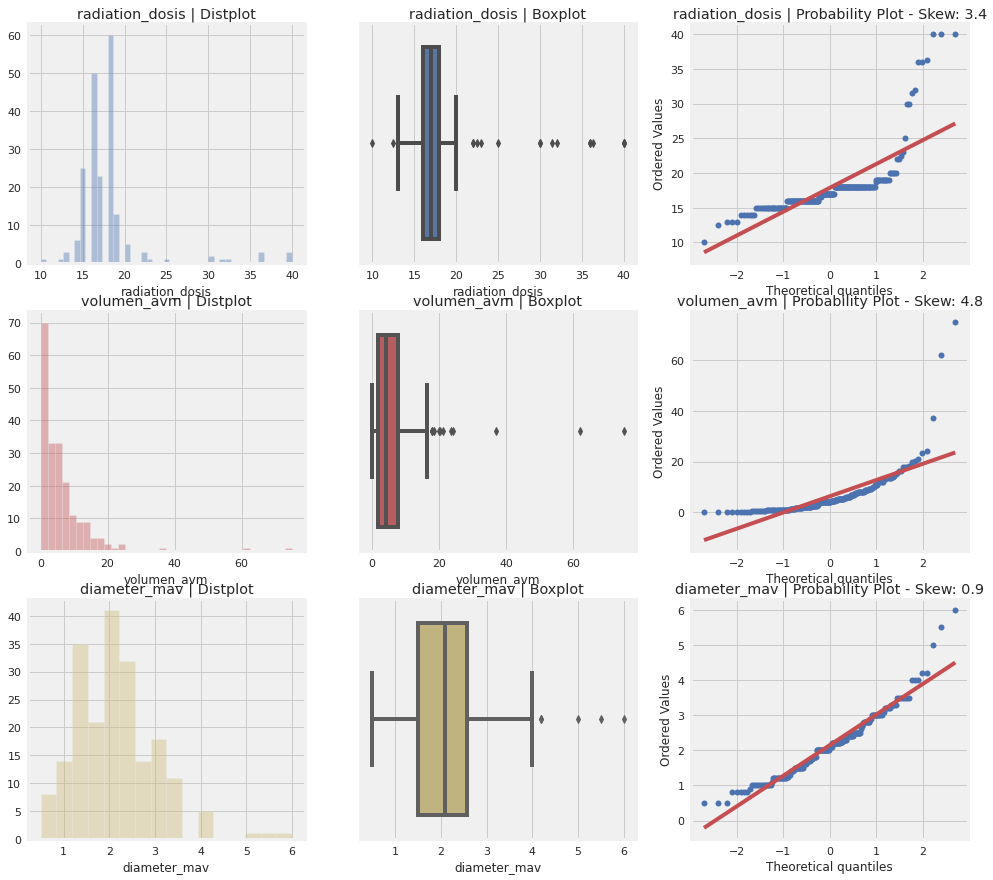

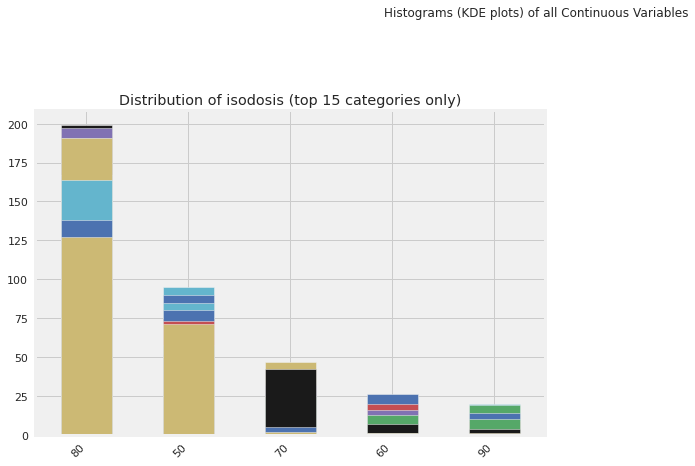

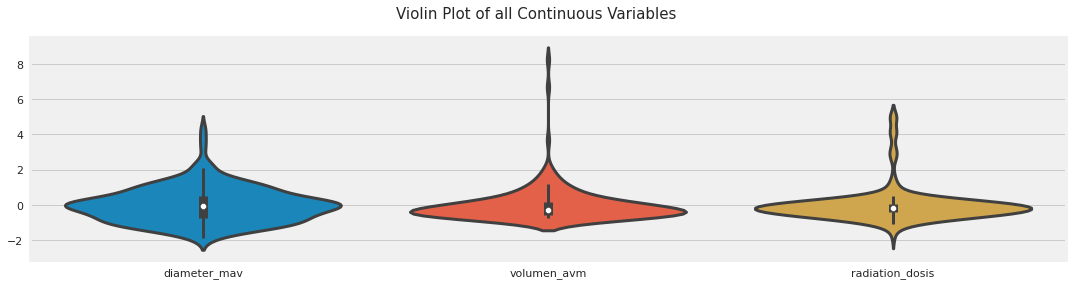

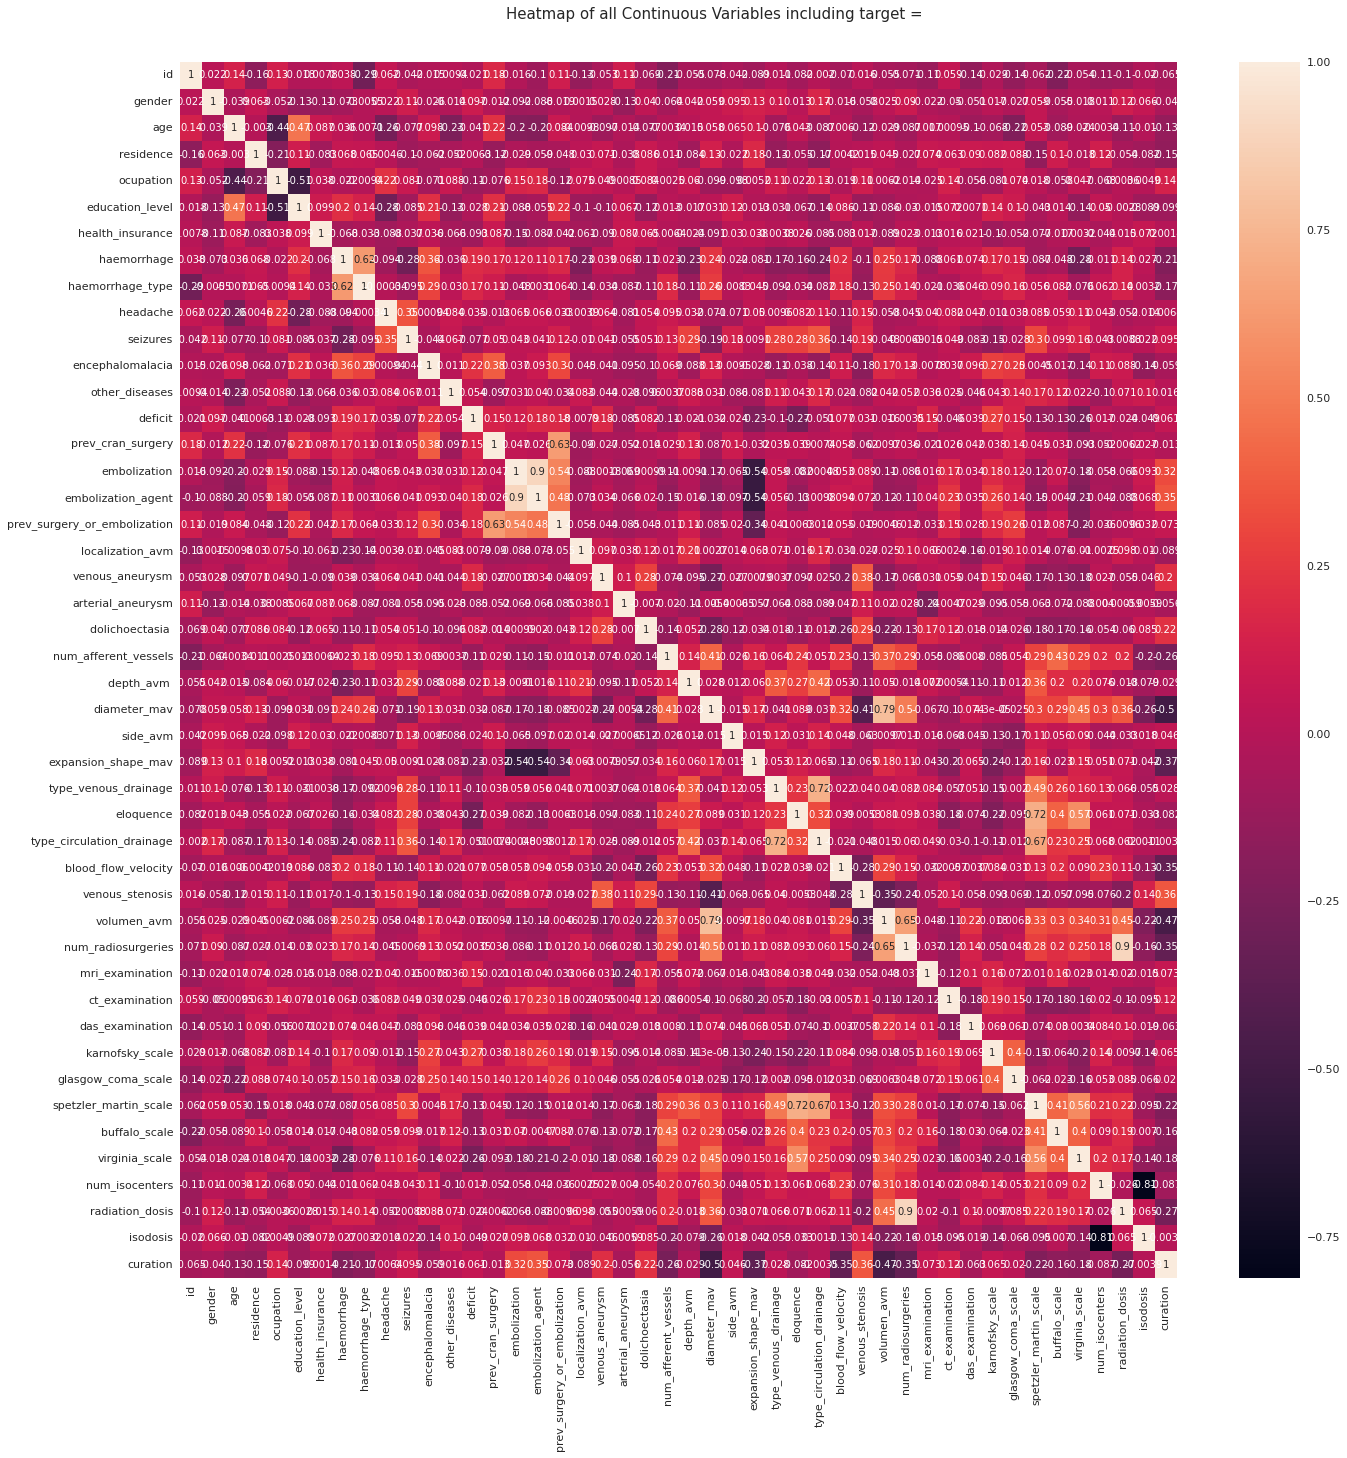

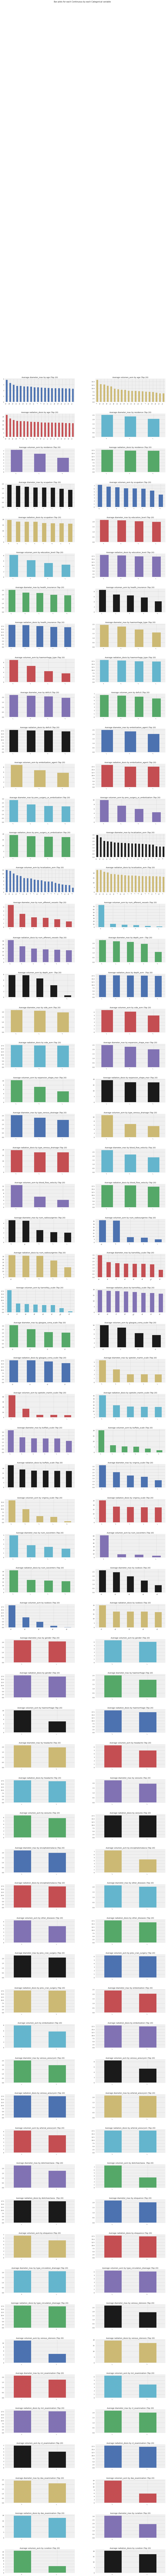

Time to run AutoViz = 57 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [156]:
from autoviz.AutoViz_Class import AutoViz_Class

# EDA using autoviz
%matplotlib inline
autoviz = AutoViz_Class().AutoViz(csv_file)

## **Data Preprocessing**
---

In [157]:
# Dataset copy
dataset_final = dataset.copy()

# Reduced dataset
COLUMNS_TO_REMOVE = ['id','residence','education_level','health_insurance','mri_examination','ct_examination','das_examination']
dataset_final.drop(COLUMNS_TO_REMOVE, inplace=True, axis=1)

dataset_final.head(10)

,gender,age,ocupation,haemorrhage,haemorrhage_type,headache,seizures,encephalomalacia,other_diseases,deficit,...,num_radiosurgeries,karnofsky_scale,glasgow_coma_scale,spetzler_martin_scale,buffalo_scale,virginia_scale,num_isocenters,radiation_dosis,isodosis,curation
0,1,11,6,1,1,1,1,1,2,1,...,1,80,15,3,3,4,1,18.0,80,1
1,2,8,6,1,3,1,1,1,2,2,...,1,90,15,3,3,2,1,18.0,80,1
2,2,32,3,1,1,1,1,2,2,4,...,1,90,15,3,2,1,1,18.0,80,1
3,2,52,3,1,4,1,1,2,2,3,...,1,90,15,3,2,2,2,12.5,50,1
4,1,38,1,2,4,1,1,2,2,4,...,1,90,15,3,2,1,1,18.0,80,1
5,2,20,1,1,4,2,2,2,2,2,...,1,80,15,3,4,3,1,18.0,80,0
6,1,38,1,2,4,1,1,2,2,4,...,1,90,15,2,2,1,1,18.0,80,0
7,1,45,4,1,4,1,2,1,1,1,...,1,80,15,3,2,3,2,15.0,50,1
8,1,9,6,1,1,1,1,1,2,4,...,1,90,15,3,2,2,2,16.0,50,1
9,2,10,6,1,4,1,1,1,2,4,...,1,90,15,2,2,1,1,17.0,80,1


**Split dataset (Train / Test):**

In [158]:
from sklearn.model_selection import train_test_split

# Train / Test (30% test size)
dataset_train, dataset_test = train_test_split(dataset_final, test_size = 0.3, random_state = 1) 

**Validate Imbalanced dataset:**

(141, 39)


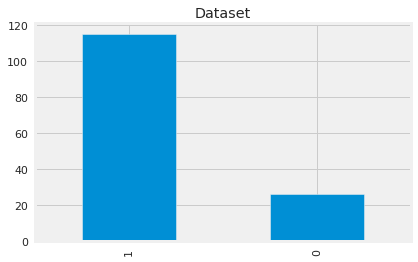

In [159]:
target_count = dataset_train['curation'].value_counts()
target_count.plot(kind='bar', title='Dataset');
print(dataset_train.shape)

**Balanceo (SMOTE + Tomek)**

(224, 39)


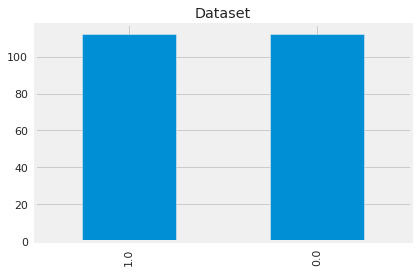

In [160]:
import numpy as np
from imblearn.combine import SMOTETomek

num_columns = dataset_train.shape[1]
dataset_columns = dataset_train.columns

# Obteniendo valores a procesar
X = dataset_train.iloc[:, 0:num_columns - 1].values
y = dataset_train.iloc[:, num_columns - 1].values

# SMOTE Tomek
smt = SMOTETomek(sampling_strategy='not majority')
X_sm, y_sm = smt.fit_resample(X, y)

balanced_dataset = np.column_stack((X_sm, y_sm))

# Dataset final normalizado
dataset_train = pd.DataFrame(balanced_dataset,columns=dataset_columns, dtype=np.float64)

# Print Balanceo por clase
target_count = dataset_train['curation'].value_counts()
target_count.plot(kind='bar', title='Dataset');
print(dataset_train.shape)

**Getting X and Y:**

In [161]:
# Features name
var_dependent = ['curation']
var_independent = list(dataset_train.columns)
var_independent.remove('curation');

**A) Training dataset**

In [162]:
# Train dataset
X_train = dataset_train[var_independent]
Y_train = dataset_train[var_dependent]

print("X_train size is %s" % str(X_train.shape))
X_train.head(5)

X_train size is (224, 38)


,gender,age,ocupation,haemorrhage,haemorrhage_type,headache,seizures,encephalomalacia,other_diseases,deficit,...,volumen_avm,num_radiosurgeries,karnofsky_scale,glasgow_coma_scale,spetzler_martin_scale,buffalo_scale,virginia_scale,num_isocenters,radiation_dosis,isodosis
0,1.0,27.0,1.0,2.0,4.0,1.0,1.0,2.0,2.0,4.0,...,0.864,1.0,90.0,15.0,1.0,2.0,0.0,1.0,18.0,80.0
1,2.0,55.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,...,1.125,1.0,80.0,15.0,3.0,3.0,2.0,1.0,18.0,80.0
2,1.0,35.0,1.0,1.0,3.0,1.0,2.0,2.0,2.0,4.0,...,7.680,1.0,80.0,15.0,3.0,3.0,2.0,1.0,17.0,80.0
3,2.0,23.0,3.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,...,5.320,1.0,80.0,15.0,1.0,2.0,2.0,1.0,18.0,80.0
4,2.0,33.0,1.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,...,24.000,8.0,90.0,15.0,5.0,5.0,4.0,2.0,40.0,50.0


In [163]:
print("Y_train size is %s" % str(Y_train.shape))
Y_train.head(5)

Y_train size is (224, 1)


,curation
0,1.0
1,1.0
2,1.0
3,1.0
4,0.0


**B) Testing dataset**

In [164]:
# Test dataset
X_test = dataset_test[var_independent]
Y_test = dataset_test[var_dependent]

print("X_test size is %s" % str(X_test.shape))
X_test.head(5)

X_test size is (61, 38)


,gender,age,ocupation,haemorrhage,haemorrhage_type,headache,seizures,encephalomalacia,other_diseases,deficit,...,volumen_avm,num_radiosurgeries,karnofsky_scale,glasgow_coma_scale,spetzler_martin_scale,buffalo_scale,virginia_scale,num_isocenters,radiation_dosis,isodosis
196,2,20,5,1,1,1,2,2,2,3,...,20.00,1,90,15,2,2,1,1,18.0,80
95,2,12,6,2,4,2,2,2,2,4,...,4.00,1,90,15,2,2,2,1,17.0,80
173,1,35,7,1,3,1,1,2,2,2,...,2.04,1,100,15,2,1,2,1,18.0,80
123,1,14,6,2,4,1,1,2,2,4,...,9.11,1,80,15,1,2,1,1,16.0,50
38,2,47,3,1,2,1,1,1,2,1,...,5.40,1,80,14,3,3,3,3,16.0,50


In [165]:
print("Y_test size is %s" % str(Y_test.shape))
Y_test.head(5)

Y_test size is (61, 1)


,curation
196,1
95,1
173,1
123,1
38,1


## **Training dataset Preprocessing**
---


**Training data Scaling:**

In [166]:
from sklearn.preprocessing import StandardScaler

# Scaling
scaler = StandardScaler()
X_train[var_independent] = scaler.fit_transform(X_train[var_independent])

In [167]:
print ("\nTraining dataset:")
X_train.head(10)


Training dataset:


,gender,age,ocupation,haemorrhage,haemorrhage_type,headache,seizures,encephalomalacia,other_diseases,deficit,...,volumen_avm,num_radiosurgeries,karnofsky_scale,glasgow_coma_scale,spetzler_martin_scale,buffalo_scale,virginia_scale,num_isocenters,radiation_dosis,isodosis
0,-1.087759,-0.121194,-1.302635,1.643423,1.138642,-0.334769,-0.847872,0.772349,0.117942,0.974366,...,-0.792084,-0.324505,1.017569,0.490475,-1.968319,-0.596386,-2.775064,-0.714681,-0.047566,0.685946
1,1.102157,1.966084,-0.372385,-0.702349,-1.207022,-0.334769,-0.847872,-1.506351,0.117942,0.974366,...,-0.765695,-0.324505,-0.327287,0.490475,0.375313,0.546852,-0.078553,-0.714681,-0.047566,0.685946
2,-1.087759,0.475171,-1.302635,-0.702349,0.356754,-0.334769,1.350917,0.772349,0.117942,0.974366,...,-0.102958,-0.324505,-0.327287,0.490475,0.375313,0.546852,-0.078553,-0.714681,-0.238811,0.685946
3,1.102157,-0.419377,-0.372385,1.643423,1.138642,3.204651,1.350917,0.772349,0.117942,0.974366,...,-0.341563,-0.324505,-0.327287,0.490475,-1.968319,-0.596386,-0.078553,-0.714681,-0.047566,0.685946
4,1.102157,0.326080,-1.302635,-0.702349,0.356754,-0.334769,1.350917,0.772349,0.117942,-1.585214,...,1.547062,3.418782,1.017569,0.490475,2.718944,2.833329,2.617958,1.442082,4.159812,-1.497400
5,-1.087759,-1.761198,1.022989,1.643423,1.138642,-0.334769,1.350917,0.772349,0.117942,0.121172,...,6.703375,4.488293,-0.327287,0.490475,1.547128,2.833329,1.269702,1.442082,2.534234,-1.497400
6,1.102157,-0.643014,-1.302635,-0.702349,1.138642,3.204651,1.350917,0.772349,0.117942,-0.732021,...,-0.353696,-0.324505,-0.327287,0.490475,0.375313,1.690090,1.269702,-0.714681,-0.047566,0.685946
7,1.102157,-0.717559,-1.302635,-0.702349,0.356754,-0.334769,1.350917,-1.506351,0.117942,0.974366,...,0.485469,-0.324505,-0.327287,0.490475,0.375313,-0.596386,-0.078553,-0.714681,-0.047566,0.685946
8,-1.087759,-1.761198,1.022989,-0.702349,0.356754,-0.334769,1.350917,-1.506351,0.117942,0.974366,...,-0.636788,-0.324505,-0.327287,0.490475,0.375313,0.546852,1.269702,-0.714681,-0.047566,0.685946
9,1.102157,-1.239379,1.022989,-0.702349,-0.425134,-0.334769,1.350917,0.772349,0.117942,0.121172,...,-0.828886,-0.324505,1.017569,0.490475,0.375313,0.546852,-0.078553,-0.714681,-0.047566,0.685946


---
## **Artificial Neural Network (find function)**
---

**Architecture of Artificial Neural Network:**

In [168]:
# Importando Keras y Tensorflow
from keras.models import Sequential
from keras.layers import Dense

num_neuronas_entrada = X_train.shape[1]

def crear_red_neuronal(kernel_init, func_activation, optimizer):
    # Inicializando la Red Neuronal
    neural_network = Sequential()

    # Agregado la Capa de entrada y la primera capa oculta
    neural_network.add(Dense(units = 20, kernel_initializer = kernel_init, activation = func_activation, input_dim = num_neuronas_entrada))

    # Agregando capa oculta
    neural_network.add(Dense(units = 20, kernel_initializer = kernel_init, activation = func_activation))

    # Agregando capa oculta
    neural_network.add(Dense(units = 10, kernel_initializer = kernel_init, activation = func_activation))

    # Agregando capa oculta
    neural_network.add(Dense(units = 5, kernel_initializer = kernel_init, activation = func_activation))

    # Agregando capa de salida
    neural_network.add(Dense(units = 1, kernel_initializer = kernel_init, activation = 'sigmoid'))

    neural_network.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return neural_network

In [169]:
from keras.wrappers.scikit_learn import KerasClassifier

# Obteniendo la red plantilla
red_neuronal_obtenida = KerasClassifier(build_fn = crear_red_neuronal)

**Definiendo valores posibles para los Hiper-parámetros:**

In [170]:
# Posibles valores de los Hiper-parámetros de Arquitectura
kernel_init = ['uniform', 'normal']    # ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
func_activation = ['relu','tanh']   # ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']

# Posibles valores de los Hiper-parámetros de compilación
optimizer = [ 'SGD', 'Adam']

# Otros
batch_size = [8, 16, 32]
nb_epoch = [40, 50, 100]

# Diccionario de valores
param_values = dict(kernel_init=kernel_init, 
                    func_activation=func_activation,
                    optimizer=optimizer,
                    batch_size=batch_size,
                    nb_epoch=nb_epoch)

print(param_values)

{'kernel_init': ['uniform', 'normal'], 'func_activation': ['relu', 'tanh'], 'optimizer': ['SGD', 'Adam'], 'batch_size': [8, 16, 32], 'nb_epoch': [40, 50, 100]}


**Entrenando la Red:**

In [171]:
%%time

from sklearn.model_selection import GridSearchCV

SCORING = 'balanced_accuracy' # Se busca optimizar esta métrica

# Entrenamiento
grid_model = GridSearchCV(estimator = red_neuronal_obtenida, param_grid = param_values, scoring = SCORING)
grid_model.fit(X_train, Y_train)

14/14 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5268
CPU times: user 4min 52s, sys: 4.72 s, total: 4min 57s
Wall time: 5min 3s


**Obteniendo resultados:**

In [172]:
print("Mejor score: %f usando params: %s \n" % (grid_model.best_score_, grid_model.best_params_))

means = grid_model.cv_results_['mean_test_score']
stds = grid_model.cv_results_['std_test_score']
params = grid_model.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Mejor score: 0.350676 usando params: {'batch_size': 16, 'func_activation': 'tanh', 'kernel_init': 'normal', 'nb_epoch': 50, 'optimizer': 'Adam'} 

0.300000 (0.244949) with: {'batch_size': 8, 'func_activation': 'relu', 'kernel_init': 'uniform', 'nb_epoch': 40, 'optimizer': 'SGD'}
0.300000 (0.244949) with: {'batch_size': 8, 'func_activation': 'relu', 'kernel_init': 'uniform', 'nb_epoch': 40, 'optimizer': 'Adam'}
0.300000 (0.244949) with: {'batch_size': 8, 'func_activation': 'relu', 'kernel_init': 'uniform', 'nb_epoch': 50, 'optimizer': 'SGD'}
0.300000 (0.244949) with: {'batch_size': 8, 'func_activation': 'relu', 'kernel_init': 'uniform', 'nb_epoch': 50, 'optimizer': 'Adam'}
0.300000 (0.244949) with: {'batch_size': 8, 'func_activation': 'relu', 'kernel_init': 'uniform', 'nb_epoch': 100, 'optimizer': 'SGD'}
0.300000 (0.244949) with: {'batch_size': 8, 'func_activation': 'relu', 'kernel_init': 'uniform', 'nb_epoch': 100, 'optimizer': 'Adam'}
0.300000 (0.244949) with: {'batch_size': 8, 'func_

**Architecture for Artificial Neural Network: Visualization**

In [173]:
# Mejor score: 0.435027 usando params: {'batch_size': 16, 'func_activation': 'tanh', 'kernel_init': 'normal', 'nb_epoch': 40, 'optimizer': 'Adam'} 

neural_network = crear_red_neuronal('normal', 'tanh', 'Adam');

# ANN architecture
neural_network.summary()

Model: "sequential_1085"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5425 (Dense)          (None, 20)                780       
                                                                 
 dense_5426 (Dense)          (None, 20)                420       
                                                                 
 dense_5427 (Dense)          (None, 10)                210       
                                                                 
 dense_5428 (Dense)          (None, 5)                 55        
                                                                 
 dense_5429 (Dense)          (None, 1)                 6         
                                                                 
Total params: 1,471
Trainable params: 1,471
Non-trainable params: 0
_________________________________________________________________


**Train Artificial Neural Network:**

In [174]:
%%time

BATCH_SIZE = 16
EPOCHS = 40

iterations = neural_network.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS)

Epoch 1/40
14/14 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.6027
Epoch 3/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.8438
Epoch 4/40
14/14 [==============================] - 0s 3ms/step - loss: 0.6550 - accuracy: 0.8393
Epoch 5/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.8438
Epoch 6/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5442 - accuracy: 0.8705
Epoch 7/40
14/14 [==============================] - 0s 3ms/step - loss: 0.4917 - accuracy: 0.8929
Epoch 8/40
14/14 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.9241
Epoch 9/40
14/14 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.9509
Epoch 10/40
14/14 [==============================] - 0s 2ms/step - loss: 0.3629 - accuracy: 0.9509
Epoch 11/40
14/14 [

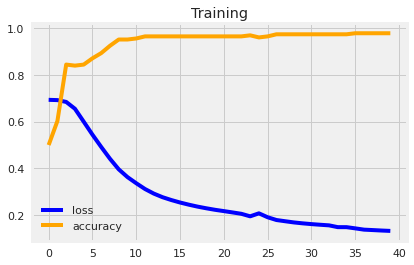

In [175]:
# Ploting results
import matplotlib.pyplot as plt
plt.title('Training')
plt.plot(iterations.history['loss'], color='blue')
plt.plot(iterations.history['accuracy'], color='orange')
plt.legend(['loss', 'accuracy'])
plt.show()

**Saving function (model):**

In [176]:
# Keras format
function_name = "avm_function.h5"
neural_network.save(project_folder + "/model/" + function_name, save_format='h5')

**Prediction**



**Load function (model):**

In [177]:
# Load function/model (h5) from disk
from tensorflow.keras.models import load_model

project_folder = open('config.txt').readline().rstrip('\n')
function_name = "avm_function.h5"
loaded_function = load_model(project_folder + "/model/" + function_name)

# ANN Architecture
loaded_function.summary()

Model: "sequential_1085"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5425 (Dense)          (None, 20)                780       
                                                                 
 dense_5426 (Dense)          (None, 20)                420       
                                                                 
 dense_5427 (Dense)          (None, 10)                210       
                                                                 
 dense_5428 (Dense)          (None, 5)                 55        
                                                                 
 dense_5429 (Dense)          (None, 1)                 6         
                                                                 
Total params: 1,471
Trainable params: 1,471
Non-trainable params: 0
_________________________________________________________________


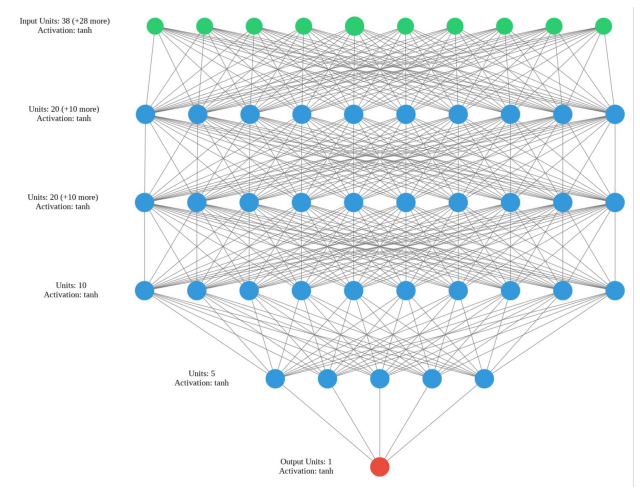

In [178]:
# ANN Graph
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from keras_visualizer import visualizer
visualizer(neural_network, format='jpg')
fig = plt.figure(figsize=(10, 10))
plt.grid(False)
plt.axis('off')
plt.imshow(image.load_img('graph.jpg'))
plt.show()

**PREDICTION:**

In [179]:
X_test = dataset_test[var_independent]
X_test.head(5)

,gender,age,ocupation,haemorrhage,haemorrhage_type,headache,seizures,encephalomalacia,other_diseases,deficit,...,volumen_avm,num_radiosurgeries,karnofsky_scale,glasgow_coma_scale,spetzler_martin_scale,buffalo_scale,virginia_scale,num_isocenters,radiation_dosis,isodosis
196,2,20,5,1,1,1,2,2,2,3,...,20.00,1,90,15,2,2,1,1,18.0,80
95,2,12,6,2,4,2,2,2,2,4,...,4.00,1,90,15,2,2,2,1,17.0,80
173,1,35,7,1,3,1,1,2,2,2,...,2.04,1,100,15,2,1,2,1,18.0,80
123,1,14,6,2,4,1,1,2,2,4,...,9.11,1,80,15,1,2,1,1,16.0,50
38,2,47,3,1,2,1,1,1,2,1,...,5.40,1,80,14,3,3,3,3,16.0,50


In [180]:
# Scaling
X_test[var_independent] = scaler.transform(X_test[var_independent])
X_test.head(5)

,gender,age,ocupation,haemorrhage,haemorrhage_type,headache,seizures,encephalomalacia,other_diseases,deficit,...,volumen_avm,num_radiosurgeries,karnofsky_scale,glasgow_coma_scale,spetzler_martin_scale,buffalo_scale,virginia_scale,num_isocenters,radiation_dosis,isodosis
196,1.102157,-0.643014,0.557864,-0.702349,-1.207022,-0.334769,1.350917,0.772349,0.117942,0.121172,...,1.142646,-0.324505,1.017569,0.490475,-0.796503,-0.596386,-1.426809,-0.714681,-0.047566,0.685946
95,1.102157,-1.239379,1.022989,1.643423,1.138642,3.204651,1.350917,0.772349,0.117942,0.974366,...,-0.475021,-0.324505,1.017569,0.490475,-0.796503,-0.596386,-0.078553,-0.714681,-0.238811,0.685946
173,-1.087759,0.475171,1.488114,-0.702349,0.356754,-0.334769,-0.847872,0.772349,0.117942,-0.732021,...,-0.673185,-0.324505,2.362426,0.490475,-0.796503,-1.739625,-0.078553,-0.714681,-0.047566,0.685946
123,-1.087759,-1.090288,1.022989,1.643423,1.138642,-0.334769,-0.847872,0.772349,0.117942,0.974366,...,0.041621,-0.324505,-0.327287,0.490475,-1.968319,-0.596386,-1.426809,-0.714681,-0.430055,-1.497400
38,1.102157,1.369719,-0.372385,-0.702349,-0.425134,-0.334769,-0.847872,-1.506351,0.117942,-1.585214,...,-0.333475,-0.324505,-0.327287,-2.338126,0.375313,0.546852,1.269702,3.598844,-0.430055,-1.497400


In [181]:
# Prediction for X_test
Y_pred = loaded_function.predict(X_test)
dataset_test['Prediction'] = Y_pred

# Show new dataset
dataset_test.head(15)

,gender,age,ocupation,haemorrhage,haemorrhage_type,headache,seizures,encephalomalacia,other_diseases,deficit,...,karnofsky_scale,glasgow_coma_scale,spetzler_martin_scale,buffalo_scale,virginia_scale,num_isocenters,radiation_dosis,isodosis,curation,Prediction
196,2,20,5,1,1,1,2,2,2,3,...,90,15,2,2,1,1,18.0,80,1,0.930779
95,2,12,6,2,4,2,2,2,2,4,...,90,15,2,2,2,1,17.0,80,1,0.930764
173,1,35,7,1,3,1,1,2,2,2,...,100,15,2,1,2,1,18.0,80,1,0.930780
123,1,14,6,2,4,1,1,2,2,4,...,80,15,1,2,1,1,16.0,50,1,0.930774
38,2,47,3,1,2,1,1,1,2,1,...,80,14,3,3,3,3,16.0,50,1,0.569107
94,2,20,5,2,4,1,1,2,1,3,...,80,15,1,2,1,1,17.0,80,1,0.929482
78,1,28,1,2,4,1,1,2,2,4,...,90,15,1,1,1,2,16.0,50,1,0.930780
58,1,38,2,1,1,1,1,1,2,2,...,60,12,3,4,3,1,18.0,80,1,0.930730
29,2,9,6,1,1,1,1,1,2,4,...,100,15,1,2,2,1,19.0,80,1,0.930777
4,1,38,1,2,4,1,1,2,2,4,...,90,15,3,2,1,1,18.0,80,1,0.930579


In [182]:
THREASHOLD = 0.5 
Y_pred_final = (Y_pred > THREASHOLD).astype(int)

dataset_test['PredictionFinal'] = Y_pred_final

# Show new dataset
dataset_test.head(15)

,gender,age,ocupation,haemorrhage,haemorrhage_type,headache,seizures,encephalomalacia,other_diseases,deficit,...,glasgow_coma_scale,spetzler_martin_scale,buffalo_scale,virginia_scale,num_isocenters,radiation_dosis,isodosis,curation,Prediction,PredictionFinal
196,2,20,5,1,1,1,2,2,2,3,...,15,2,2,1,1,18.0,80,1,0.930779,1
95,2,12,6,2,4,2,2,2,2,4,...,15,2,2,2,1,17.0,80,1,0.930764,1
173,1,35,7,1,3,1,1,2,2,2,...,15,2,1,2,1,18.0,80,1,0.930780,1
123,1,14,6,2,4,1,1,2,2,4,...,15,1,2,1,1,16.0,50,1,0.930774,1
38,2,47,3,1,2,1,1,1,2,1,...,14,3,3,3,3,16.0,50,1,0.569107,1
94,2,20,5,2,4,1,1,2,1,3,...,15,1,2,1,1,17.0,80,1,0.929482,1
78,1,28,1,2,4,1,1,2,2,4,...,15,1,1,1,2,16.0,50,1,0.930780,1
58,1,38,2,1,1,1,1,1,2,2,...,12,3,4,3,1,18.0,80,1,0.930730,1
29,2,9,6,1,1,1,1,1,2,4,...,15,1,2,2,1,19.0,80,1,0.930777,1
4,1,38,1,2,4,1,1,2,2,4,...,15,3,2,1,1,18.0,80,1,0.930579,1


**Confusion Matrix (aka Error Matrix):**

In [183]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred_final)
print ("\nConfusion Matrix: \n", cm)


Confusion Matrix: 
 [[ 6  3]
 [ 4 48]]


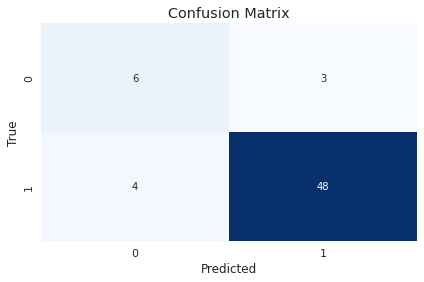

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt     
ax=plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cbar=False, cmap="Blues");
ax.set_xlabel('Predicted');
ax.set_ylabel('True'); 
ax.set_title('Confusion Matrix'); 

**Metrics:**

In [185]:
TN, FP, FN, TP = cm.ravel()

In [186]:
# Accuracy
accuracy = (TP+TN)/(TP+TN+FP+FN)
# Sensitivity/Recall
sensitivity = TP/(TP+FN)
# Specificity
specificity = TN/(TN+FP)
# Positive Predictive Value (PPV)/ Precision
PPV = TP/(TP + FP)
# Negative Predictive Value (NPV)
NPV = TN/(TN + FN)

In [187]:
print("Accuracy: ","({:.2%})".format(accuracy))
print("Sensitivity:","({:.2%})".format(sensitivity))
print("Specificity:","({:.2%})".format(specificity))
print("PPV:","({:.2%})".format(PPV))
print("NPV:","({:.2%})".format(NPV))

print("Accuracy Balanceado:","({:.2%})".format((sensitivity + specificity)/2))

Accuracy:  (88.52%)
Sensitivity: (92.31%)
Specificity: (66.67%)
PPV: (94.12%)
NPV: (60.00%)
Accuracy Balanceado: (79.49%)


---
## **Support Vector Machines (find function)**
---

**KERNEL: linear**

In [188]:
from sklearn.svm import SVC 

model = SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
                max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
                verbose=False)

model.fit(X_train, Y_train)

# Predicciones
Y_pred = model.predict(X_test)
# print("Y_pred:", Y_pred)

Y_pred_final = (Y_pred > THREASHOLD).astype(int)

**Confusion Matrix (aka Error Matrix):**

In [189]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred_final)
print ("\nConfusion Matrix: \n", cm)


Confusion Matrix: 
 [[ 7  2]
 [ 4 48]]


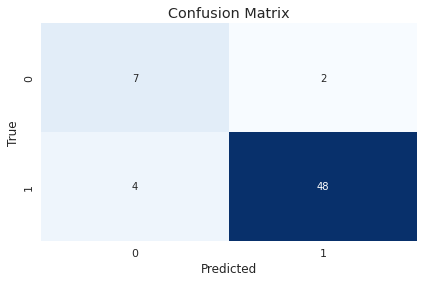

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt     
ax=plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cbar=False, cmap="Blues");
ax.set_xlabel('Predicted');
ax.set_ylabel('True'); 
ax.set_title('Confusion Matrix'); 

**Metrics:**

In [191]:
TN, FP, FN, TP = cm.ravel()

In [192]:
# Accuracy
accuracy = (TP+TN)/(TP+TN+FP+FN)
# Sensitivity/Recall
sensitivity = TP/(TP+FN)
# Specificity
specificity = TN/(TN+FP)
# Positive Predictive Value (PPV)/ Precision
PPV = TP/(TP + FP)
# Negative Predictive Value (NPV)
NPV = TN/(TN + FN)

In [193]:
print("Accuracy: ","({:.2%})".format(accuracy))
print("Sensitivity:","({:.2%})".format(sensitivity))
print("Specificity:","({:.2%})".format(specificity))
print("PPV:","({:.2%})".format(PPV))
print("NPV:","({:.2%})".format(NPV))

print("Accuracy Balanceado:","({:.2%})".format((sensitivity + specificity)/2))

Accuracy:  (90.16%)
Sensitivity: (92.31%)
Specificity: (77.78%)
PPV: (96.00%)
NPV: (63.64%)
Accuracy Balanceado: (85.04%)


**KERNEL: poly**

In [194]:
from sklearn.svm import SVC 

model = SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
                max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
                verbose=False)

model.fit(X_train, Y_train)

# Predicciones
Y_pred = model.predict(X_test)
# print("Y_pred:", Y_pred)

Y_pred_final = (Y_pred > THREASHOLD).astype(int)

**Confusion Matrix (aka Error Matrix):**

In [195]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred_final)
print ("\nConfusion Matrix: \n", cm)


Confusion Matrix: 
 [[ 7  2]
 [15 37]]


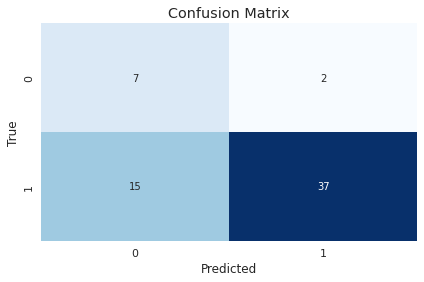

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt     
ax=plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cbar=False, cmap="Blues");
ax.set_xlabel('Predicted');
ax.set_ylabel('True'); 
ax.set_title('Confusion Matrix'); 

**Metrics:**

In [197]:
TN, FP, FN, TP = cm.ravel()

In [198]:
# Accuracy
accuracy = (TP+TN)/(TP+TN+FP+FN)
# Sensitivity/Recall
sensitivity = TP/(TP+FN)
# Specificity
specificity = TN/(TN+FP)
# Positive Predictive Value (PPV)/ Precision
PPV = TP/(TP + FP)
# Negative Predictive Value (NPV)
NPV = TN/(TN + FN)

In [199]:
print("Accuracy: ","({:.2%})".format(accuracy))
print("Sensitivity:","({:.2%})".format(sensitivity))
print("Specificity:","({:.2%})".format(specificity))
print("PPV:","({:.2%})".format(PPV))
print("NPV:","({:.2%})".format(NPV))

print("Accuracy Balanceado:","({:.2%})".format((sensitivity + specificity)/2))

Accuracy:  (72.13%)
Sensitivity: (71.15%)
Specificity: (77.78%)
PPV: (94.87%)
NPV: (31.82%)
Accuracy Balanceado: (74.47%)


---
## **Decision Trees (find function)**
---

**DT:**

In [208]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Y_pred_final_tree = (Y_pred > THREASHOLD).astype(int)

**Confusion Matrix (aka Error Matrix):**

In [209]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred_final_tree)
print ("\nConfusion Matrix: \n", cm)


Confusion Matrix: 
 [[ 7  2]
 [15 37]]


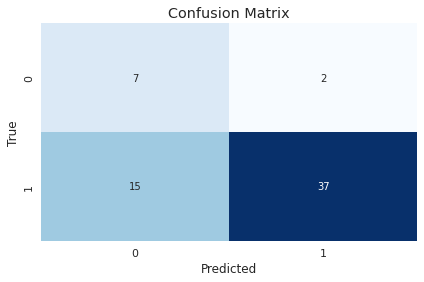

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt     
ax=plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cbar=False, cmap="Blues");
ax.set_xlabel('Predicted');
ax.set_ylabel('True'); 
ax.set_title('Confusion Matrix'); 

**Metrics:**

In [211]:
TN, FP, FN, TP = cm.ravel()

In [212]:
# Accuracy
accuracy = (TP+TN)/(TP+TN+FP+FN)
# Sensitivity/Recall
sensitivity = TP/(TP+FN)
# Specificity
specificity = TN/(TN+FP)
# Positive Predictive Value (PPV)/ Precision
PPV = TP/(TP + FP)
# Negative Predictive Value (NPV)
NPV = TN/(TN + FN)

In [213]:
print("Accuracy: ","({:.2%})".format(accuracy))
print("Sensitivity:","({:.2%})".format(sensitivity))
print("Specificity:","({:.2%})".format(specificity))
print("PPV:","({:.2%})".format(PPV))
print("NPV:","({:.2%})".format(NPV))

print("Accuracy Balanceado:","({:.2%})".format((sensitivity + specificity)/2))

Accuracy:  (72.13%)
Sensitivity: (71.15%)
Specificity: (77.78%)
PPV: (94.87%)
NPV: (31.82%)
Accuracy Balanceado: (74.47%)


Visualizing DT:

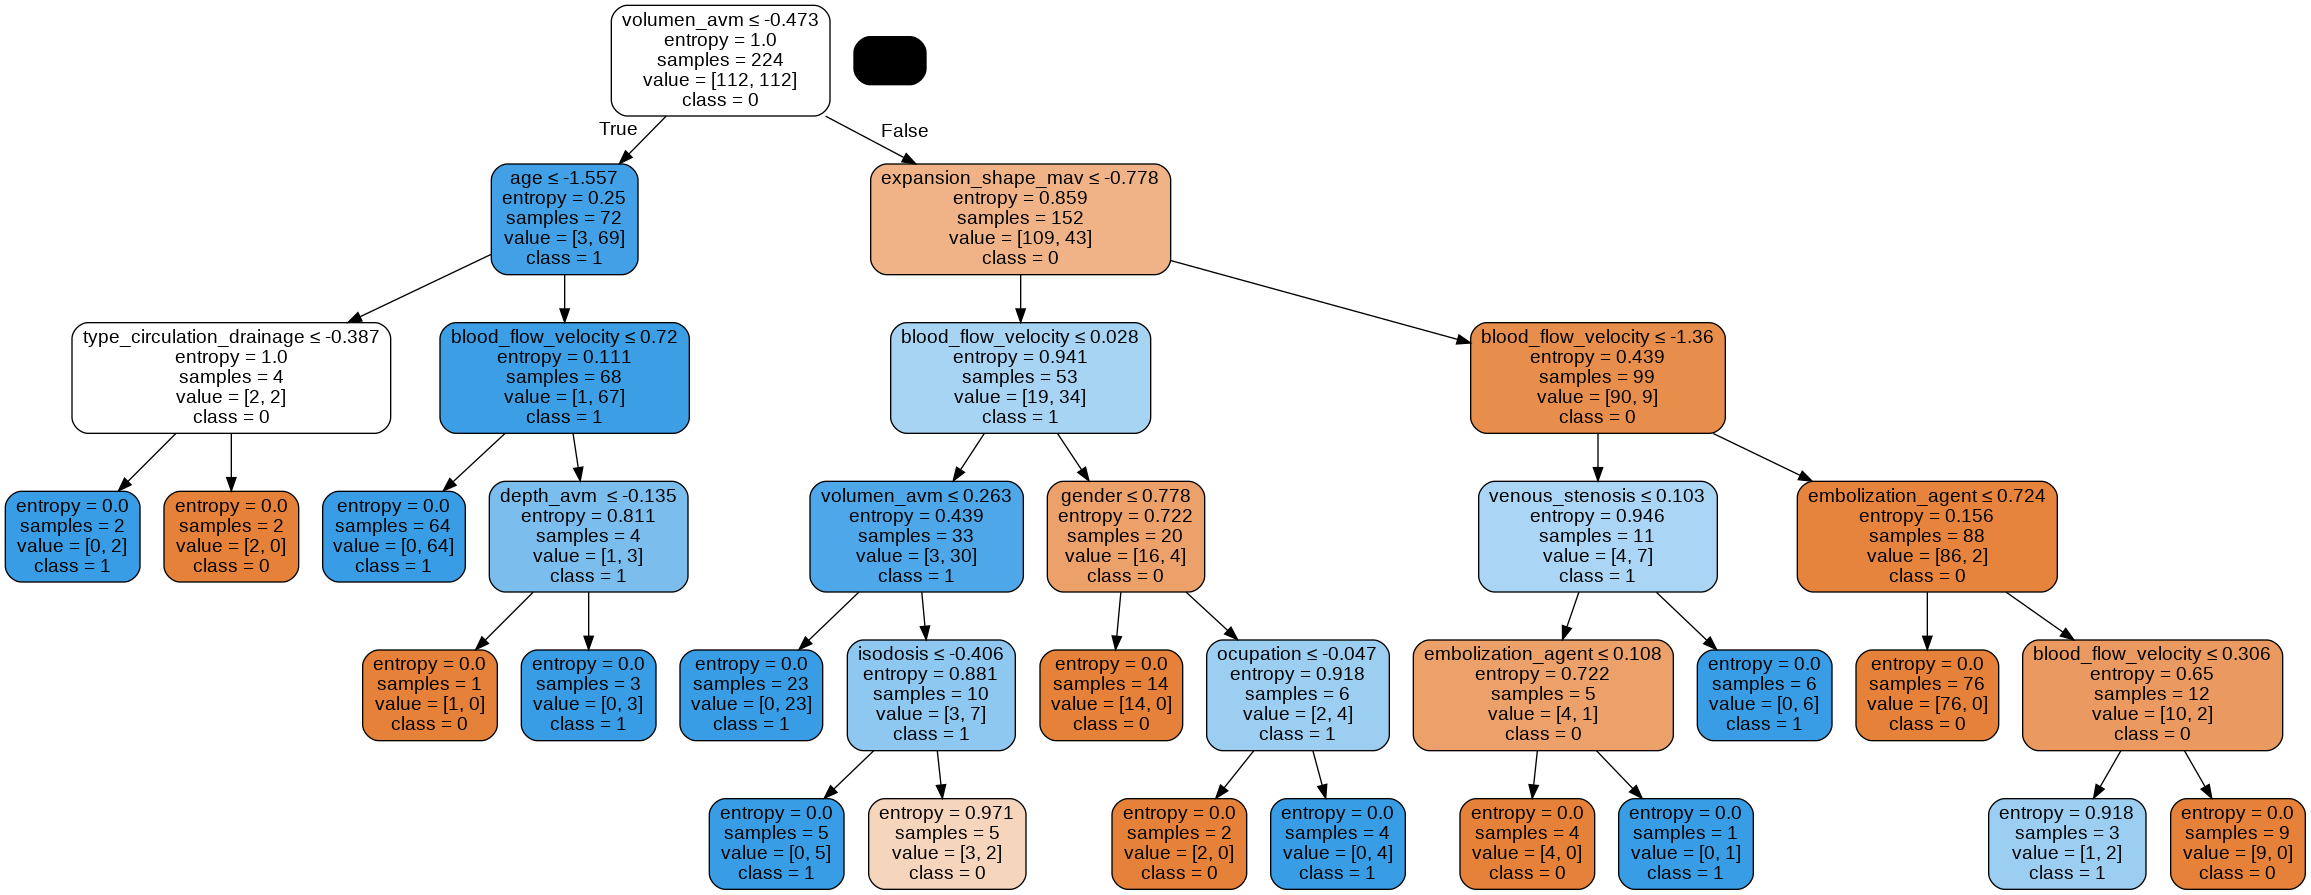

In [214]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = var_independent, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('mav.png')
Image(graph.create_png())